---
title: "Week 7 - Regression and Correlation"
date: 2024-05-16
date-format: full
author:
    - name:
          given: Pranav Kumar
          family: Mishra
      affiliations:
          - ref: rushsurg
          - ref: rushortho
      corresponding: true
      url: https://drpranavmishra.com
      email: pranav_k_mishra@rush.edu
      orcid: 0000-0001-5219-6269
      role: "Post Doctoral Research Fellow"

execute:
    enabled: false
    echo: true
    output: true
---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown, Math, Latex

from scipy import stats
import math

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.regression.mixed_linear_model import MixedLMResults

import pingouin as pg

![](https://prwatech.in/blog/wp-content/uploads/2019/07/type1error.png)


![](https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/sas/sas4-onesamplettest/Figure1.PNG)

## Estimating $\alpha$ and $\beta$ by the least squares criterion


We want to chose an *a* and *b* to minimize:

$$
\sum_{i=1}^{n} [y_i - (a + bx_i)]^{2}
$$


### Normal equations

(Not the normal distributions, but just a mathematical name).


$ \sum y_i = na + b\sum x_i  $

$ \sum x_i y_i = a \sum x_i + b \sum {x_i}^2 $


Residual:
$
e_i = y_i - \hat{y_i} = y_i - (a + bx_i)
$

$
s_{y,x} = \sqrt{\frac{\sum (y_i - \hat{y}_i)^2} {n-2}}  \approx \sigma _ {y,x}
$, where $s_{y,x}$ is an estimate of $\sigma _ {y,x}$

### Test and Confidence Intervals

Under the null hypothesis, $\beta = 0$

$
t = \frac{b}{s_b}
$ has a $t$ distribution on $n-2$ degrees of freedom

A $1-\alpha$ confidence interval for $\beta$ is given by:

$$
b \pm = t_\alpha s_b
$$

Intercept:

$
t = \frac{a}{s_a}
$
and 
$
a \pm t_\alpha s_a
$

In [58]:
age_kidney_json  = {
    2: [20],
    3: [18],
    4: [22, 25],
    5: [17, 20, 20, 22],
    6: [21, 22],
    7: [20, 20, 22, 24],
    8: [18, 25, 33],
    9: [27, 31],
    10: [18, 24, 34],
    11: [25, 28]
}

age_kidney_df = pd.DataFrame([(age, length) for age, lengths in age_kidney_json.items() for length in lengths],
                  columns=["age", "length"])

# age_kidney_df

In [3]:
X = age_kidney_df['age']
y = age_kidney_df['length']

In [4]:
# Add a constant term to the predictor variable (age)
X = sm.add_constant(X)

In [5]:
# Fit the linear regression model
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 length   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     8.113
Date:                Thu, 23 May 2024   Prob (F-statistic):            0.00935
Time:                        16:28:11   Log-Likelihood:                -66.806
No. Observations:                  24   AIC:                             137.6
Df Residuals:                      22   BIC:                             140.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4826      2.491      6.618      0.000      11.317      21.648
age            0.9606      0.337      2.848      0.009       0.261       1.660
==============================================================================
Omnibus:                        1.516   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                0.667
Skew:                           0.396   Prob(JB):                        0.716
Kurtosis:                       3.199   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
intercept, slope = model.params['const'], model.params['age']

print(f"Intercept (b0): {intercept:.2f}")
print(f"Slope (b1): {slope:.2f}")

Intercept (b0): 16.48
Slope (b1): 0.96


In [7]:
confidence_intervals = model.conf_int()
confidence_intervals

,0,1
const,11.317180,21.647946
age,0.261169,1.660010


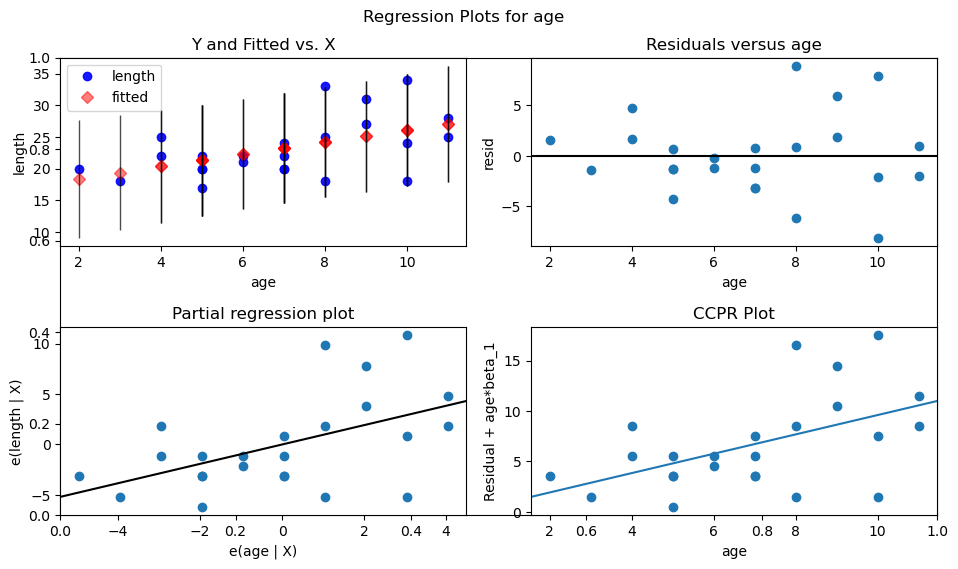

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.plot_regress_exog(model, 'age', fig=fig)
plt.show()


The residuals appear to be increasing as the age increases

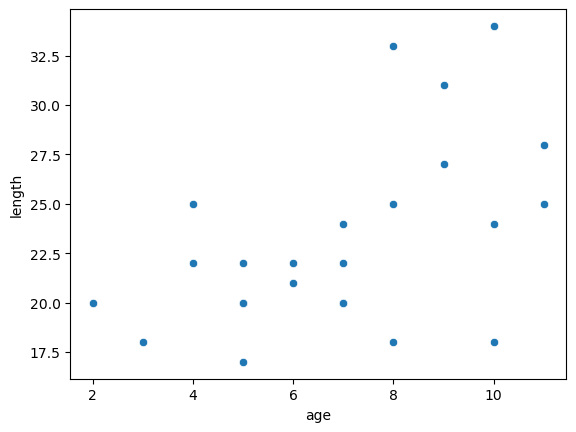

In [9]:
fig1, ax1 = plt.subplots()
ax1 = sns.scatterplot(data=age_kidney_df, x='age', y='length', ax=ax1)



<Axes: xlabel='age', ylabel='length'>

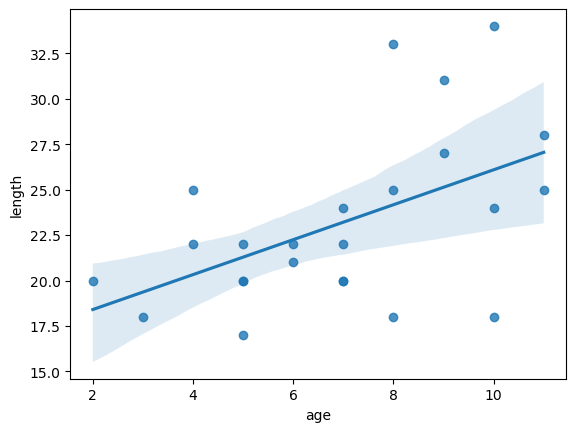

In [10]:
fig1, ax1 = plt.subplots()
sns.regplot(data=age_kidney_df, x='age', y='length', ax=ax1,  marker='o')

$$ r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}

{\sqrt{\sum (x_i - \bar{x})^2{\sum (y_i - \bar{y})^2}}}

$$

## Retinal Permeability

In [11]:
retinal_perm_json = {
    19.5: 0.0,
    15.0: 38.0,
    13.5: 59.0,
    23.3: 119.2,
    6.3: 97.4,
    2.0: 129.5,
    1.8: 1987.0,
    1.8: 2487.0,
    1.8: 3180.0,
    1.8: 4385.0
}

retinal_perm_df = pd.DataFrame(retinal_perm_json.items(), columns=["Penetration", "ERG"])
retinal_perm_df

,Penetration,ERG
0,19.5,0.0
1,15.0,38.0
2,13.5,59.0
3,23.3,119.2
4,6.3,97.4
5,2.0,129.5
6,1.8,4385.0


## Homework

### 8-11

- Association between high blood pressure, diabetes, and high levels of lipids in the blood
- HTN --> Lower insulin sensitivity vs. normotensive
- Physicial fitness affects insulin sensitivity

Endre T, Mattiasson I, Hulthén UL, Lindgärde F, Berglund G. Insulin resistance is coupled to low physical fitness in normotensive men with a family history of hypertension. J Hypertens. 1994;12(1):81-88.

@endre_insulin_1994

In [37]:
# Import raw data from Endre et al
obesity_df = pd.read_csv('/home/pranav/work/pranavmishra90/courses/enrolled/epor-2024/src/8-16.csv')

# Split into two dataframes for "Controls" and "Relatives"
ob_controls = obesity_df[obesity_df['Group'] == 'Control']
ob_relatives = obesity_df[obesity_df['Group'] == 'Relative']

Text(0.5, 1.0, 'Relatives')

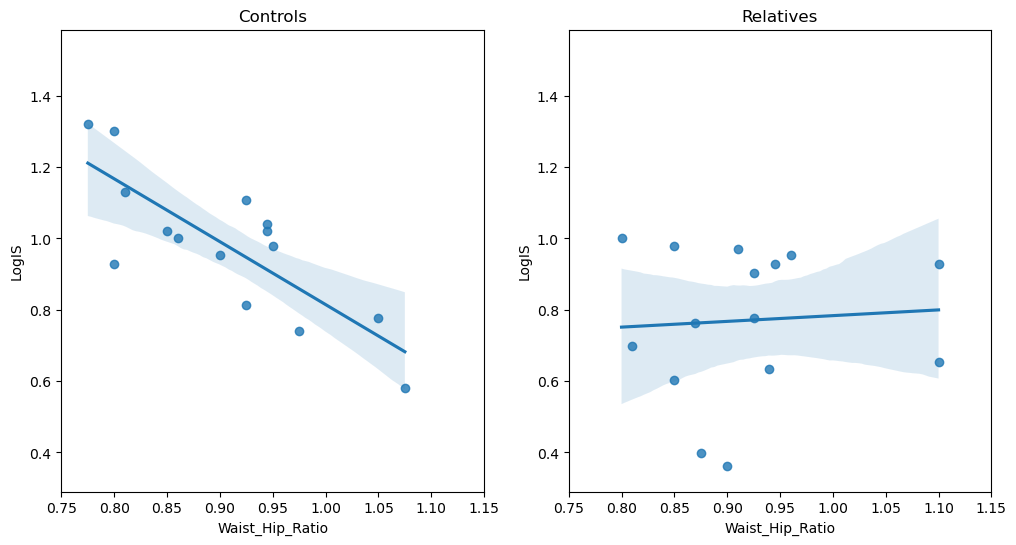

In [42]:
# Plot the data

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

x_var = 'Waist_Hip_Ratio'
y_var = 'LogIS'

# Plot Data
sns.regplot(x=x_var, y=y_var, data=ob_controls, marker='o', ax=ax[0])
sns.regplot(x=x_var, y=y_var, data=ob_relatives, marker='o', ax=ax[1])


# Set the y-axis limits to be the same
max_y = max(ob_controls[y_var].max(), ob_relatives[y_var].max())
min_y = min(ob_controls[y_var].min(), ob_relatives[y_var].min())

max_y_adj = max_y * 1.2
min_y_adj = min_y * 0.8

for ax_instance in ax:
    ax_instance.set_ylim(min_y_adj, max_y_adj)
    ax_instance.set_xlim(0.75, 1.15)



# Formatting
ax[0].set_title('Controls')
ax[1].set_title('Relatives')

### `Controls`

/home/pranav/miniforge3/envs/outcomes/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  LogIS   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     22.95
Date:                Thu, 23 May 2024   Prob (F-statistic):           0.000353
Time:                        17:06:18   Log-Likelihood:                 11.061
No. Observations:                  15   AIC:                            -18.12
Df Residuals:                      13   BIC:                            -16.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.5793      0.335      7.695      0.000       1.855       3.303
Waist_Hip_Ratio    -1.7648      0.368     -4.790      0.000      -2.561      -0.969
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.830
Skew:                          -0.314   Prob(JB):                        0.660
Kurtosis:                       2.034   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Intercept (b0): 2.58
Slope (b1): -1.76


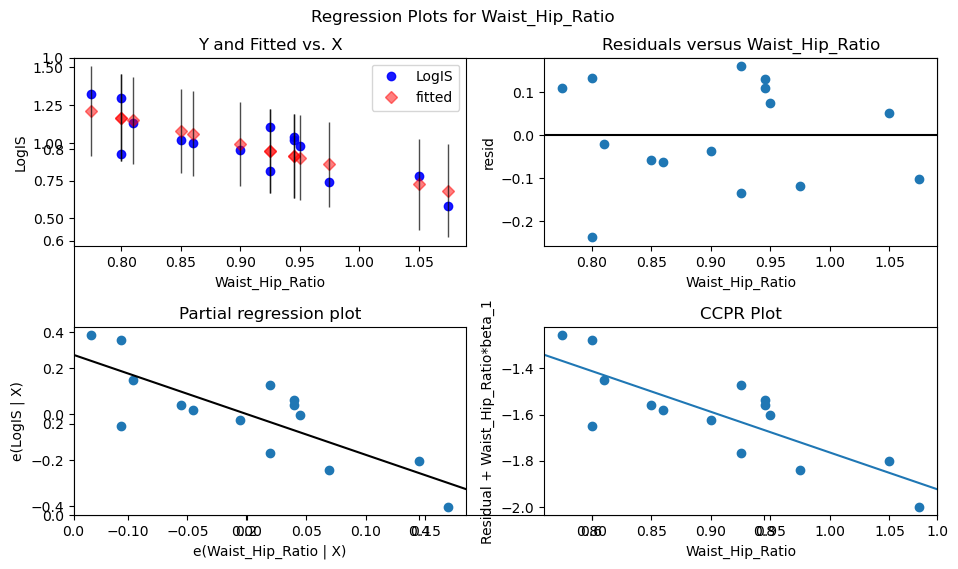

In [56]:
# Controls

X_control = ob_controls[x_var]
y_control = ob_controls[y_var]

# Add a constant term to the predictor variable
X_control = sm.add_constant(X_control)

# Fit the linear regression model
model_cont = sm.OLS(y_control, X_control).fit()

display(Markdown(f"### `Controls`"))
display(model_cont.summary())

intercept_cont, slope_cont = model_cont.params['const'], model_cont.params[x_var]

print(f"Intercept (b0): {intercept_cont:.2f}")
print(f"Slope (b1): {slope_cont:.2f}")

ci_control = model_cont.conf_int()
display(Markdown(f"#### Confidence Intervals"))
display(ci_control)


fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.plot_regress_exog(model_cont, x_var, fig=fig)
plt.show()

### `Relatives`

/home/pranav/miniforge3/envs/outcomes/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  LogIS   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.072
Method:                 Least Squares   F-statistic:                   0.06050
Date:                Thu, 23 May 2024   Prob (F-statistic):              0.810
Time:                        17:09:13   Log-Likelihood:                 2.7763
No. Observations:                  15   AIC:                            -1.553
Df Residuals:                      13   BIC:                           -0.1364
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6223      0.604      1.031      0.321      -0.682       1.926
Waist_Hip_Ratio     0.1611      0.655      0.246      0.810      -1.254       1.577
==============================================================================
Omnibus:                        1.661   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.436   Jarque-Bera (JB):                1.325
Skew:                          -0.636   Prob(JB):                        0.516
Kurtosis:                       2.291   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Intercept (b0): 0.62
Slope (b1): 0.16


#### Confidence Intervals

,0,1
const,-0.681670,1.926291
Waist_Hip_Ratio,-1.254265,1.576554


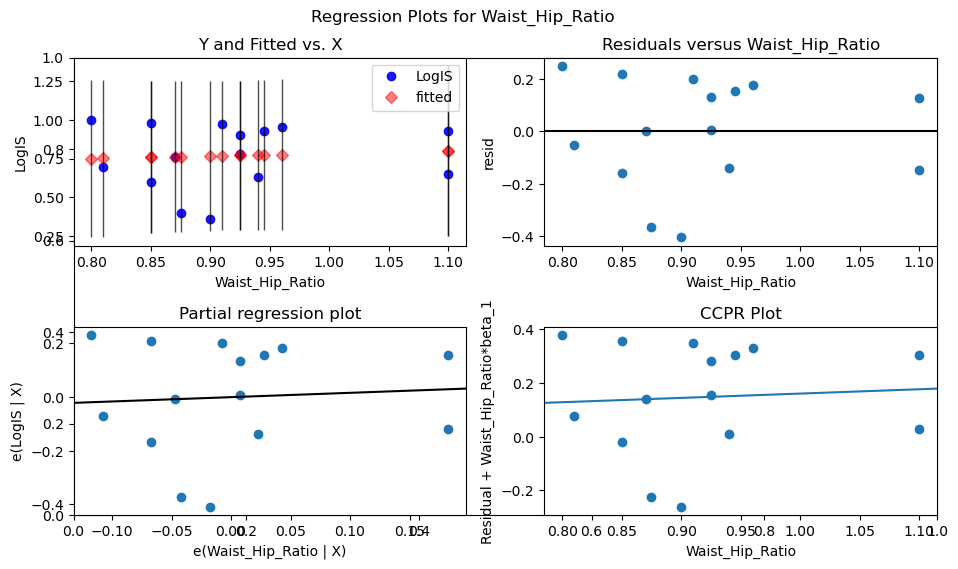

In [59]:
# Relatives

X_relative = ob_relatives[x_var]
y_relative = ob_relatives[y_var]

# Add a constant term to the predictor variable
X_relative = sm.add_constant(X_relative)

# Fit the linear regression model
model_rel = sm.OLS(y_relative, X_relative).fit()

display(Markdown(f"### `Relatives`"))
display(model_rel.summary())

intercept_rel, slope_rel = model_rel.params['const'], model_rel.params[x_var]

print(f"Intercept (b0): {intercept_rel:.2f}")
print(f"Slope (b1): {slope_rel:.2f}")

ci_rel = model_rel.conf_int()
display(Markdown(f"#### Confidence Intervals"))
display(ci_rel)

fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.plot_regress_exog(model_rel, x_var, fig=fig)
plt.show()

In [55]:
md_text = f"""

### Answer:

No, the relationship between the waist-hip-ratio (WHR) and Insulin Sensitivity are not the same in subjects who have no immediate family member with HTN vs. those who do.

In the control group, log of Insulin Sensitivity (LogIS) decreased as the WHR increased (slope `{slope_cont:.2f}`). In subjects with HTN relatives, LogIS remained relatively constant as WHR increased (slope `{slope_rel:.2f}`). Furthermore, in the control group, the insulin sensitivity remained high at lower WHR (approx. `1.2` vs `0.8` at WHR of 0.8). 

This suggests that when a person has a first-degree relative with hypertension, their insulin sensitivity is not dependent on WHR and is lower across all WHR, when compared with healthy controls.


"""

display(Markdown(md_text))



### Answer:

No, the relationship between the waist-hip-ratio (WHR) and Insulin Sensitivity are not the same in subjects who have no immediate family member with HTN vs. those who do.

In the control group, log of Insulin Sensitivity (LogIS) decreased as the WHR increased (slope `-1.76`). In subjects with HTN relatives, LogIS remained relatively constant as WHR increased (slope `0.16`). Furthermore, in the control group, the insulin sensitivity remained high at lower WHR (approx. `1.2` vs `0.8` at WHR of 0.8). 

This suggests that when a person has a first-degree relative with hypertension, their insulin sensitivity is not dependent on WHR and is lower across all WHR, when compared with healthy controls.


